# Evaluating Airbnb performance in Seattle

We are interested in Airbnb's Seattle  business throughout the year. Our main questions are as follows:
1. What time of the year are the busiest for Airbnb' listings?
2. How does the price changes thoughout the year?
3. What are the types of listings does Airbnb have in Seattle?

## 0. Data Exploration

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# load the datasets
df_calender = pd.read_csv('./calendar.csv')
df_listings = pd.read_csv('./listings.csv')
df_reviews = pd.read_csv('./reviews.csv')

# display the first 5 row of the df_calender
df_calender.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [2]:
# display the first 5 rows of the df_listings
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
# display the first 5 rows of the df_reviews
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [19]:
# Check the number of exmples in each dataset
print('Number of examples in the calender dataset: ', df_calender.shape[0])
print('Number of examples in the listings dataset: ', df_listings.shape[0])
print('Number of examples in the reviews dataset: ', df_reviews.shape[0])

Number of examples in the calender dataset:  1393570
Number of examples in the listings dataset:  3818
Number of examples in the reviews dataset:  84849


In [20]:
# check the number unique listings in the df_calender
print('Number of unique listings in the df_calender: ',df_calender.listing_id.nunique())

Number of unique listings in the df_calender:  3818


In [22]:
# change the type of date column in df_calender to datetime
df_calender['date'] = pd.to_datetime(df_calender['date'])

# check the number of null values in the date column
print('Number of Null values in in the date column: ', df_calender.date.isnull().sum())

Number of Null values in in the date column:  0


In [24]:
# check when was the data were collected
print('Data gathering strated in: ', df_calender.date.dt.to_period('M').min())
print('Data gathering ended in: ', df_calender.date.dt.to_period('M').max())

Data gathering strated in:  2016-01
Data gathering ended in:  2017-01


## 1. What time of the year are the busiest for Airbnb' listings?

In [95]:
# check the number of null values in the available column
print('Number of Null values in in the available column: ', df_calender['available'].isnull().sum())

Number of Null values in in the available column:  0


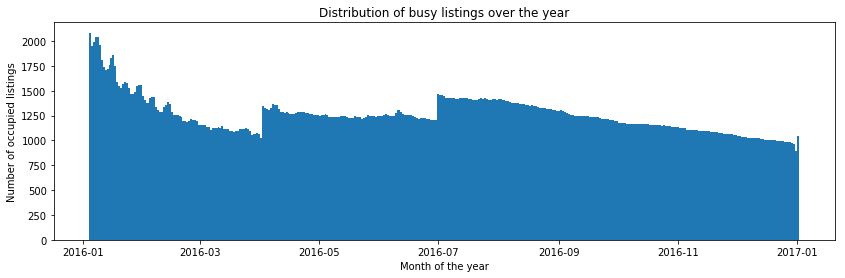

In [85]:
# create a dataframe of the occupied listings
occupied_listings = df_calender[df_calender['available'] == 'f']

# plot the distribution of busy listing by date
plt.figure(figsize=(14,4))
plt.title('Distribution of busy listings over the year')
plt.hist(occupied_listings.date, bins=365)
plt.xlabel('Month of the year')
plt.ylabel('Number of occupied listings');

In [94]:
# check the busiest months of the year
occupied_listings.date.dt.month.value_counts()

1     49603
7     44136
8     42011
4     38503
5     38387
2     37401
6     37296
9     37294
10    35920
3     34420
11    32760
12    31297
Name: date, dtype: int64

## 2. How does the price changes thoughout the year?

In [96]:
# check the number of null values in the price column
print('Number of Null values in in the price column: ', df_calender['price'].isnull().sum())

Number of Null values in in the price column:  459028


In [137]:
# create a copy of the df_calender data  
df_cp_calender = df_calender.copy()

# drop rows with NaN values in the price column
'''
The NaN values were filled with the previous value as we are interested in how prices changes over periods 
of time meaning we only need an estimation of the price
'''
df_cp_calender['price'].fillna(method='ffill', inplace=True)

# change the values type in price column to numric
df_cp_calender['price'] = pd.to_numeric(df_cp_calender['price'].str.replace('[$,]',''))

In [167]:
# print the stats of the listings' price
df_cp_calender['price'].describe()

count    1.393570e+06
mean     1.360387e+02
std      1.018518e+02
min      1.000000e+01
25%      7.500000e+01
50%      1.050000e+02
75%      1.600000e+02
max      1.650000e+03
Name: price, dtype: float64

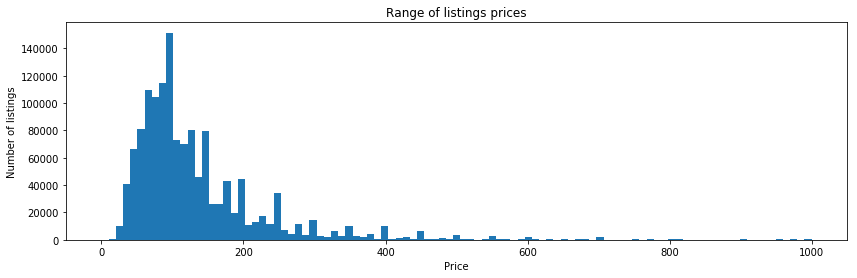

In [138]:
# plot the distribution of the price of listings
plt.figure(figsize=(14,4))
plt.title('Range of listings prices')
plt.hist(df_cp_calender.price, bins=np.linspace(0,1000,100))
plt.xlabel('Price')
plt.ylabel('Number of listings');

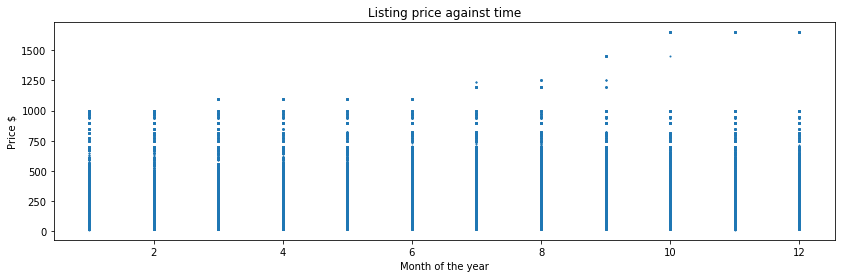

In [140]:
# plot the price of listings per month
plt.figure(figsize=(14,4))
plt.title('Listing price against time')
plt.scatter(df_cp_calender.date.dt.month, df_cp_calender.price, s=1)
plt.xlabel('Month of the year')
plt.ylabel('Price $');

## 3. What are the types of listings does Airbnb have in Seattle?

In [142]:
# check the number of null values in the property_type column
print('Number of Null values in in the property_type column: ', df_listings.property_type.isnull().sum())

Number of Null values in in the property_type column:  1


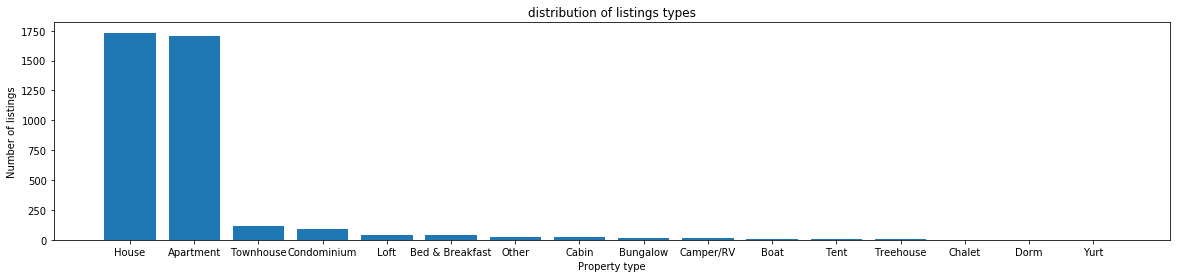

In [160]:
# plot the distribution of listings types
plt.figure(figsize=(20,4))
plt.title('distribution of listings types')
plt.bar(df_listings.property_type.value_counts().index, df_listings.property_type.value_counts().values)
plt.xlabel('Property type')
plt.ylabel('Number of listings')
plt.xticks(df_listings.property_type.value_counts().index);

In [162]:
# check the number of listings per type
df_listings.property_type.value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: property_type, dtype: int64

In [172]:
# print the percentage of house listings out of the total listings
num_house = df_listings[df_listings['property_type'] == 'House']['property_type'].count()
print(num_house/df_listings.shape[0])

0.45390256678889473


In [173]:
# print the percentage of apartment listings out of the total listings
num_apartment = df_listings[df_listings['property_type'] == 'Apartment']['property_type'].count()
print(num_apartment/df_listings.shape[0])

0.44735463593504454
